# 搭建卷积神经网络，对手写数字识别图像数据集进行 10 分类。
## 算法流程：
### （1）读取、加载、处理数据集（可选取部分数据集）； （√）
### （2）搭建卷积神经网络； （√）
### （3）训练所搭建的神经网络； （√）
### （4）利用准确率等指标评估所训练的神经网络；（√）
### 加分项 1，保存模型并加载模型，用自己手写的数字图片（手机的便签或微 软画图工具，保证没有阴影）测试分类效果，像素需要降低尽量保持在 28x28x1。 （√）
### 加分项 2，使用 pytorch 或只使用 tensorflow 完成两个案例任意一个（tf√）

（1）读取、加载、处理数据集（可选取部分数据集）；

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_x, img_y = X_train.shape[1], X_train.shape[2]

#数据预处理
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 1)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



Using TensorFlow backend.


2）搭建卷积神经网络； （加分项 2，使用 pytorch 或只使用 tensorflow 完成两个案例任意一个）

In [2]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

#构建模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),padding='same', activation='relu', input_shape=(img_x, img_y, 1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3137000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

（3）训练所搭建的神经网络； （√）

In [4]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
 
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [5]:
history = LossHistory()

In [6]:
#模型编译
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#训练
model.fit(X_train, y_train, batch_size=128, epochs=1,verbose=1,callbacks=[history])



Epoch 1/1
60000/60000 [==============================] - 194s 3ms/step - loss: 0.1341 - accuracy: 0.9589


（4）利用准确率等指标评估所训练的神经网络；

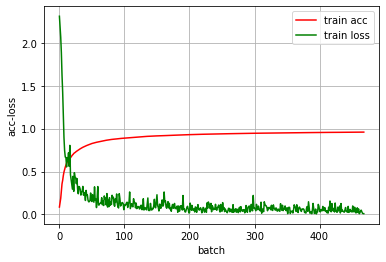

In [7]:
history.loss_plot('batch')

In [8]:
#评估模型
score = model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 11s 1ms/step
[0.03641953210450592, 0.9876000285148621]


In [9]:
y_pred=model.predict_classes(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
# 加载相关库函数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y, y_pred, cmap=plt.cm.Blues, title='混淆矩阵'):
    """
    绘制混淆矩阵
    :param y: 真实值
    :param y_pred: 预测值
    :param cmap: 热力图的颜色
    :param title: 图像标题
    :return:
    """
    cm = confusion_matrix(y, y_pred)
    classes = list(set(y))
    classes.sort()
    plt.imshow(cm, cmap)
    indices = range(len(cm))
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    # 热度表
    plt.colorbar()
    # 坐标轴含义
    plt.xlabel('guess')
    plt.ylabel('fact')
    plt.title(title)
    # 显示数据的值（Numbers）
    for first_index in range(len(cm)):
        for second_index in range(len(cm[first_index])):
            plt.text(first_index, second_index, cm[first_index][second_index])

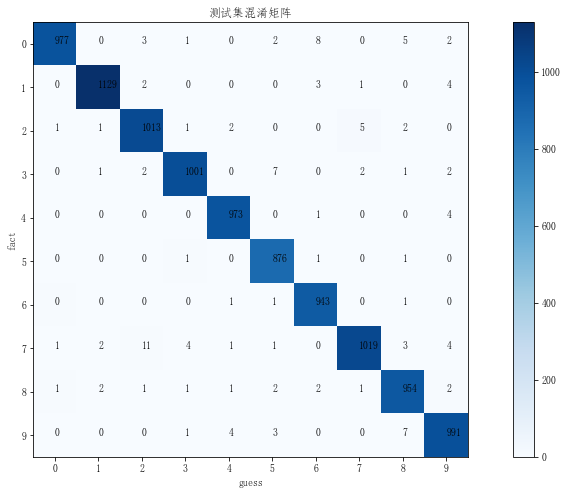

In [11]:
# 输出混淆矩阵
plt.figure(figsize=(16,8), facecolor='w')

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plot_confusion_matrix(np.argmax(y_test, axis=1),y_pred,
                      title='测试集混淆矩阵')
plt.show()

加分项 1，保存模型并加载模型，用自己手写的数字图片（手机的便签或微 软画图工具，保证没有阴影）测试分类效果，像素需要降低尽量保持在 28x28x1。

（1）保存模型并加载模型

In [12]:
model.save('mnist_cnn.h5')

In [13]:
import matplotlib.pyplot as plt

from keras.models import load_model


In [14]:
model.load_weights('mnist_cnn.h5')

In [15]:
import h5py
file=h5py.File('mnist_cnn.h5')


C:\Users\29459\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [16]:
model=keras.models.load_model(file)

In [17]:
#评估模型
score = model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 10s 1ms/step
[0.03641953210450592, 0.9876000285148621]


Help on function load_img in module keras_preprocessing.image.utils:

load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest')
    Loads an image into PIL format.
    
    # Arguments
        path: Path to image file.
        grayscale: DEPRECATED use `color_mode="grayscale"`.
        color_mode: The desired image format. One of "grayscale", "rgb", "rgba".
            "grayscale" supports 8-bit images and 32-bit signed integer images.
            Default: "rgb".
        target_size: Either `None` (default to original size)
            or tuple of ints `(img_height, img_width)`.
        interpolation: Interpolation method used to resample the image if the
            target size is different from that of the loaded image.
            Supported methods are "nearest", "bilinear", and "bicubic".
            If PIL version 1.1.3 or newer is installed, "lanczos" is also
            supported. If PIL version 3.4.0 or newer is installed, "box" and
          

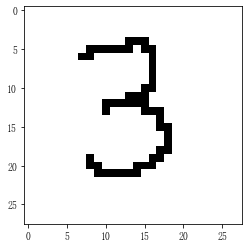

预测数字： 3


In [18]:
from keras.preprocessing.image import load_img,img_to_array
path = './data/1.png'
#读取图片、调整图片大小，转换成灰度 
help(load_img)
img = load_img(path, target_size=(28, 28),color_mode="grayscale")
#255-为了调成白底，系统灰度转换自动给处理成黑底了
img = 255-img_to_array(img)
#查看自己加载的图片
plt.imshow(img , cmap=plt.cm.binary)
plt.show()
#进行数据预测
img = img.astype('float32')/255
img = img.reshape((1, 28, 28, 1))
y_pred = model.predict(img)
print('预测数字：',np.argmax(y_pred, axis=1)[0])